# 1. Relative Strength Index (RSI)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
df = pd.read_csv("datasets/eurusd.csv", parse_dates=["Date"], index_col="Date")
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


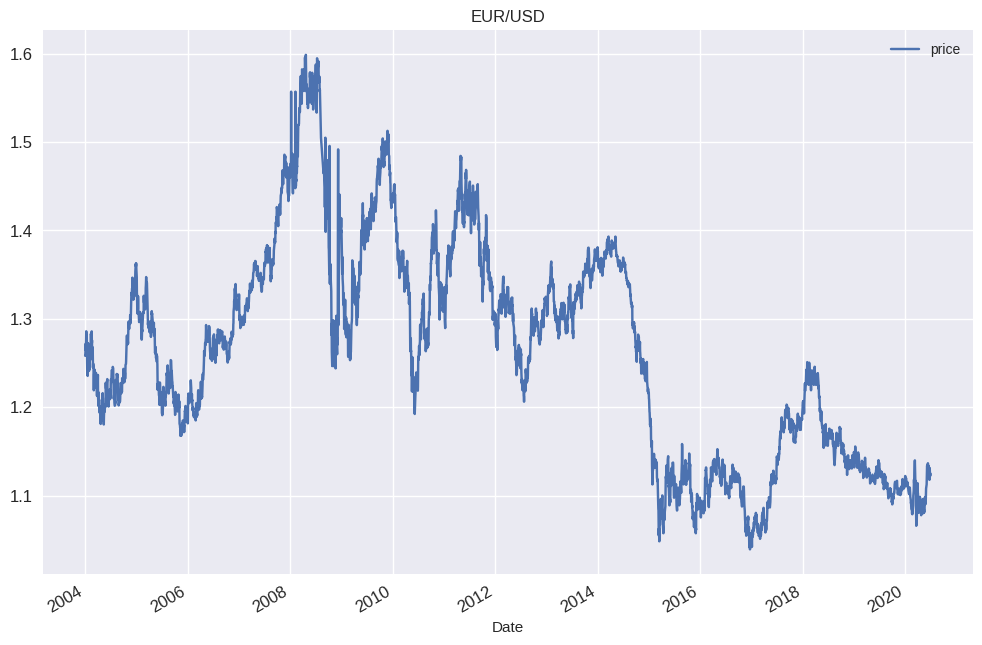

In [5]:
df.plot(figsize=(12, 8), title="EUR/USD", fontsize=12)
plt.show()

## 1-1. Relative Strength Index (RSI) with pandas

In [6]:
df.price.diff()

Date
2004-01-01         NaN
2004-01-02    0.000000
2004-01-05    0.010504
2004-01-06    0.003405
2004-01-07   -0.008008
                ...   
2020-06-24    0.003267
2020-06-25   -0.006147
2020-06-26   -0.002879
2020-06-29    0.000378
2020-06-30    0.002134
Name: price, Length: 4275, dtype: float64

In [7]:
df["U"] = np.where(df.price.diff() > 0, df.price.diff(), 0)
df["D"] = np.where(df.price.diff() < 0, -df.price.diff(), 0)
df

,price,U,D
Date,,,
2004-01-01,1.258194,0.000000,0.000000
2004-01-02,1.258194,0.000000,0.000000
2004-01-05,1.268698,0.010504,0.000000
2004-01-06,1.272103,0.003405,0.000000
2004-01-07,1.264095,0.000000,0.008008
...,...,...,...
2020-06-24,1.131235,0.003267,0.000000
2020-06-25,1.125087,0.000000,0.006147
2020-06-26,1.122208,0.000000,0.002879


In [8]:
periods = 20

df["MA_U"] = df.U.rolling(periods).mean()
df["MA_D"] = df.D.rolling(periods).mean()
df

,price,U,D,MA_U,MA_D
Date,,,,,
2004-01-01,1.258194,0.000000,0.000000,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,NaN,NaN
2004-01-05,1.268698,0.010504,0.000000,NaN,NaN
2004-01-06,1.272103,0.003405,0.000000,NaN,NaN
2004-01-07,1.264095,0.000000,0.008008,NaN,NaN
...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981


In [9]:
df["RSI"] = df.MA_U / (df.MA_U + df.MA_D) * 100
df

,price,U,D,MA_U,MA_D,RSI
Date,,,,,,
2004-01-01,1.258194,0.000000,0.000000,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,NaN,NaN,NaN
2004-01-05,1.268698,0.010504,0.000000,NaN,NaN,NaN
2004-01-06,1.272103,0.003405,0.000000,NaN,NaN,NaN
2004-01-07,1.264095,0.000000,0.008008,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190


In [10]:
df.dropna(inplace=True)
df

,price,U,D,MA_U,MA_D,RSI
Date,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086
...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190


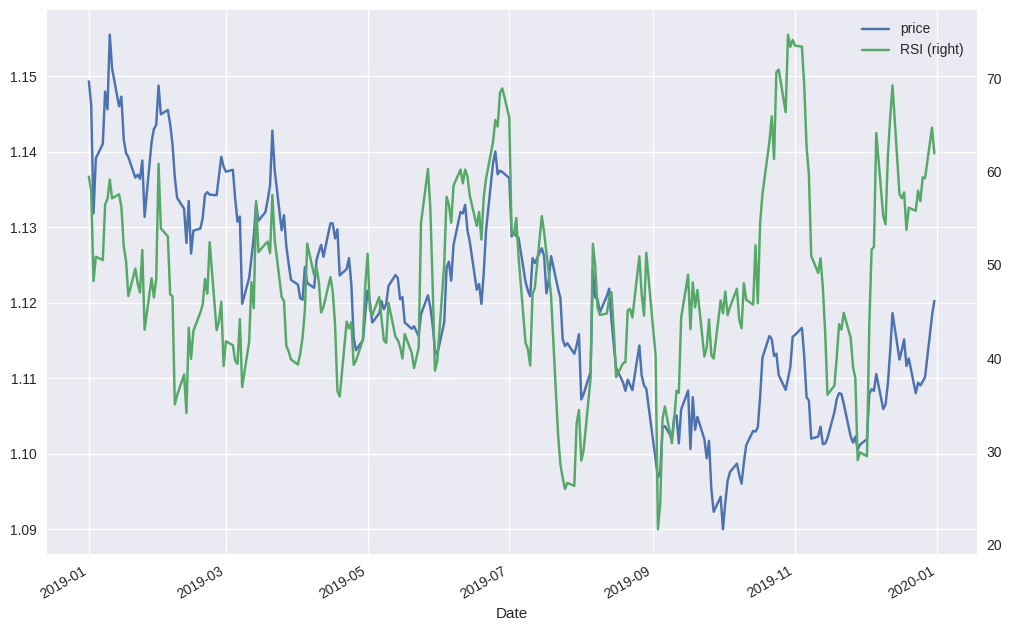

In [11]:
df.loc["2019", ["price", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.show()